## Testing the Object Oriented Paradigm

In [1]:
from user_input import MaterialProperty, Material, MixtureProperty, Mixture

# Define properties for each material
properties_mat_1 = [
    MaterialProperty('elec_cond_300k_low_doping', 20, 1),
    MaterialProperty('therm_cond_300k_low_doping', 0.0001, 1e-5),
    MaterialProperty('bulk_modulus', 100, 50),
    MaterialProperty('shear_modulus', 100, 80),
    MaterialProperty('universal_anisotropy', 2, 1),
]

properties_mat_2 = [
    MaterialProperty('elec_cond_300k_low_doping', 5, 2),
    MaterialProperty('therm_cond_300k_low_doping', 0.009, 1e-4),
    MaterialProperty('bulk_modulus', 400, 20),
    MaterialProperty('shear_modulus', 200, 100),
    MaterialProperty('universal_anisotropy', 2.3, 1.3),
]

properties_mat_3 = [
    MaterialProperty('elec_cond_300k_low_doping', 10, 1),
    MaterialProperty('therm_cond_300k_low_doping', 0.005, 1e-4),
    MaterialProperty('bulk_modulus', 300, 20),
    MaterialProperty('shear_modulus', 300, 100),
    MaterialProperty('universal_anisotropy', 2.1, 0.9),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty('elec_cond_300k_low_doping', 9),
    MixtureProperty('therm_cond_300k_low_doping', 0.007),
    MixtureProperty('bulk_modulus', 234),
    MixtureProperty('shear_modulus', 150),
    MixtureProperty('universal_anisotropy', 1.5),
]

# Create Material & Mixture instances
mat_1 = Material('mat_1', properties_mat_1)
mat_2 = Material('mat_2', properties_mat_2)
mat_3 = Material('mat_3', properties_mat_3)
mixture = Mixture('mixture', properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mixture]

user_input = {}
for entity in aggregate:
    user_input.update(entity.as_dict())

print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20, 'lower_bound': 1}, 'therm_cond_300k_low_doping': {'upper_bound': 0.0001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 100, 'lower_bound': 50}, 'shear_modulus': {'upper_bound': 100, 'lower_bound': 80}, 'universal_anisotropy': {'upper_bound': 2, 'lower_bound': 1}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 5, 'lower_bound': 2}, 'therm_cond_300k_low_doping': {'upper_bound': 0.009, 'lower_bound': 0.0001}, 'bulk_modulus': {'upper_bound': 400, 'lower_bound': 20}, 'shear_modulus': {'upper_bound': 200, 'lower_bound': 100}, 'universal_anisotropy': {'upper_bound': 2.3, 'lower_bound': 1.3}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 10, 'lower_bound': 1}, 'therm_cond_300k_low_doping': {'upper_bound': 0.005, 'lower_bound': 0.0001}, 'bulk_modulus': {'upper_bound': 300, 'lower_bound': 20}, 'shear_modulus': {'upper_bound': 300, 'lower_bound': 100}, 'universal_anisotropy': {'upper_bound': 2.1, 

In [2]:
from hashin_sktrikman_class import HashinShtrikman
HS = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

print("Property categories: ", HS.property_categories)
print("Property docs: ", HS.property_docs)

print("Lower Bounds:", HS.lower_bounds)
print("Upper Bounds:", HS.upper_bounds)

print("Number of Materials:", HS.num_materials)
print("Number of Properties:", HS.num_properties)

Loading property categories from mp_property_docs.yaml.
mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234}, 'shear_modulus': {'desired_prop': 150}, 'universal_anisotropy': {'desired_prop': 1.5}}
Property categories:  ['carrier-transport', 'elastic']
Property docs:  {'carrier-transport': {'elec_cond_300k_low_doping': None, 'therm_cond_300k_low_doping': None}, 'dielectric': {'e_electronic': None, 'e_ionic': None, 'e_total': None, 'n': None}, 'elastic': {'bulk_modulus': 'voigt', 'shear_modulus': 'voigt', 'universal_anisotropy': None}, 'magnetic': {'total_magnetization': None, 'total_magnetization_normalized_vol': None}, 'piezoelectric': {'e_ij_max': None}}
Lower Bounds: {'mat_1': {'carrier-transport': [1, 1e-05], 'elastic': [50, 80, 1]}, 'mat_2': {'carrier-transport': [2, 0.0001], 'elastic': [20, 100, 1.3]}, 'mat_3': {'carrier-transport': [1, 0.0001], 'elastic': [20, 100, 0.9]}, 'v

In [3]:
# Testing without calls to generate final dict (faster)
import json
consolidated_dict = {}
with open("consolidated_dict_01_31_2024_11_57_59") as f:
    consolidated_dict = json.load(f)

print(consolidated_dict)

{'material_id': ['mp-546266', 'mp-12863', 'mp-1509', 'mp-16290'], 'is_stable': [True, False, True, False], 'band_gap': [1.3667999999999996, 0.0, 0.7774000000000001, 0.0], 'is_metal': [False, True, False, True], 'formula': ['DyBi2IO4', 'Ba(AlSi)2', 'Sn2S3', 'ZnNi3C'], 'mp-ids-contrib': ['mp-546266', 'mp-12863', 'mp-1509', 'mp-16290'], 'elec_cond_300K_low_doping': [12.7262, 2642302.9999999995, 3.71323, 2548302.4], 'therm_cond_300K_low_doping': [7.1457e-05, 19.2792, 1.90284e-05, 17.8791], 'bulk_modulus': [74.071, 46.928, 20.346, 194.302], 'shear_modulus': [40.463, 23.063, 13.493, 64.537], 'universal_anisotropy': [1.443, 24.189, 2.364, 2.102]}


Generation 0 of 10
Generation 1 of 10
Generation 2 of 10
Generation 3 of 10
Generation 4 of 10
Generation 5 of 10
Generation 6 of 10
Generation 7 of 10
Generation 8 of 10
Generation 9 of 10

HASHIN-SHTRIKMAN + GENETIC ALGORITHM RECOMMENDED MATERIAL PROPERTIES
  Phase 1 Electrical conductivity, [S/m]    Phase 2 Electrical conductivity, [S/m]    Phase 3 Electrical conductivity, [S/m]    Phase 1 Thermal conductivity, [W/m/K]    Phase 2 Thermal conductivity, [W/m/K]    Phase 3 Thermal conductivity, [W/m/K]    Phase 1 Bulk modulus, [GPa]    Phase 2 Bulk modulus, [GPa]    Phase 3 Bulk modulus, [GPa]    Phase 1 Shear modulus, [GPa]    Phase 2 Shear modulus, [GPa]    Phase 3 Shear modulus, [GPa]    Phase 1 Universal anisotropy, []    Phase 2 Universal anisotropy, []    Phase 3 Universal anisotropy, []    Phase 1 Volume Fraction    Phase 2 Volume Fraction    Phase 3 Volume Fraction       cost
----------------------------------------  ----------------------------------------  -------------------

Cannot perform optimization when for bulk modulus phase 1 > phase 2 and for shear modulus phase 2 > phase 1 or vice versa.


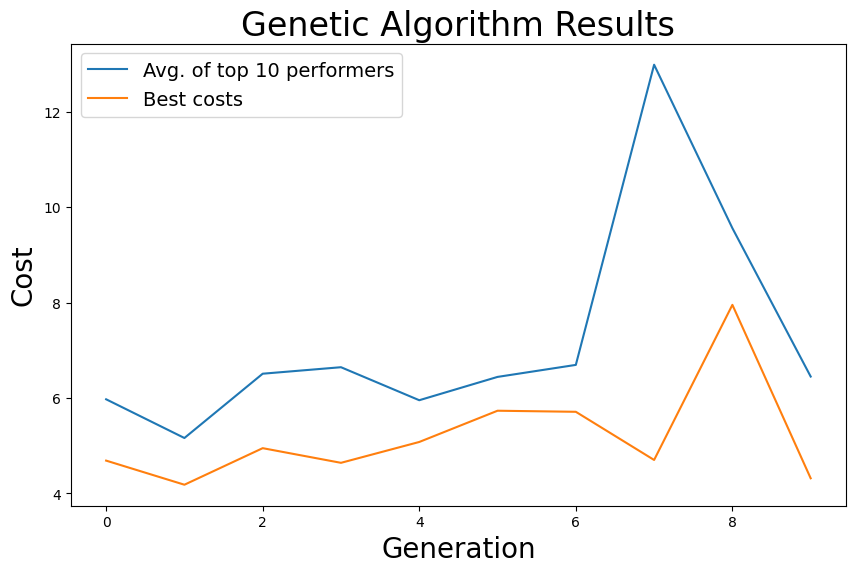

Material Matches:
{'mat1': [], 'mat2': [], 'mat3': []}


In [4]:
from hashin_sktrikman_class import HashinShtrikman

# Testing with a subset of property categories
HS.set_HS_optim_params()
HS.print_table_of_best_designs()
HS.plot_optimization_results()
HS.get_material_matches()

matches_dict = HS.get_material_matches(consolidated_dict)
print("Material Matches:")
print(matches_dict)

#HS.get_material_match_costs(matches_dict=matches_dict, consolidated_dict=consolidated_dict)


# See TODO in get_material_matches() !!

In [5]:
mat_1_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
mat_2_ids = ["mp-12863", "mp-546266",]
mat_3_ids = ["mp-546266"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids}

HS.get_material_match_costs(matches_dict=matches_dict, consolidated_dict=consolidated_dict)



MATERIALS PROJECT PAIRS AND HASHIN-SHTRIKMAN RECOMMENDED VOLUME FRACTION
Material 1 MP-ID    Material 2 MP-ID    Material 3 MP-ID      Phase 1 Electrical conductivity, [S/m]    Phase 2 Electrical conductivity, [S/m]    Phase 3 Electrical conductivity, [S/m]    Phase 1 Thermal conductivity, [W/m/K]    Phase 2 Thermal conductivity, [W/m/K]    Phase 3 Thermal conductivity, [W/m/K]    Phase 1 Bulk modulus, [GPa]    Phase 2 Bulk modulus, [GPa]    Phase 3 Bulk modulus, [GPa]    Phase 1 Shear modulus, [GPa]    Phase 2 Shear modulus, [GPa]    Phase 3 Shear modulus, [GPa]    Phase 1 Universal anisotropy, []    Phase 2 Universal anisotropy, []    Phase 3 Universal anisotropy, []    Phase 1 Volume Fraction    Phase 2 Volume Fraction    Phase 3 Volume Fraction     cost
------------------  ------------------  ------------------  ----------------------------------------  ----------------------------------------  ----------------------------------------  ---------------------------------------  ----